In [ ]:
!pip install kagglehub[pandas-datasets]

In [1]:
import pandas as pd
import os
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import wasserstein_distance

#Loading Data

In [34]:
file_path = "Pakistani_Diabetes_Dataset.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mshoaibishaaq/pakistani-diabetes-dataset",
  path=file_path)

print("First 5 records:")
df.head()

<ipython-input-34-68e2c16cb371>:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:


,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
0,60.0,1,0,76.0,29.90,41.0,130,90,0,8.90,278,0,30,1,0,5.0,0,60,1
1,57.0,1,1,64.0,24.30,39.0,120,80,1,8.50,165,0,20,1,1,20.0,0,42,1
2,58.0,0,0,73.0,25.20,34.0,140,90,0,5.65,130,1,20,0,0,0.0,0,54,0
3,27.0,0,1,60.0,22.01,30.0,110,70,0,5.00,95,0,15,0,0,0.0,0,57,0
4,56.0,1,0,70.0,25.80,43.0,125,90,0,8.30,139,1,40,1,0,5.0,1,53,1


In [35]:
# Check Data Size
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (912, 19)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      912 non-null    float64
 1   Gender   912 non-null    int64  
 2   Rgn      912 non-null    int64  
 3   wt       912 non-null    float64
 4   BMI      912 non-null    float64
 5   wst      912 non-null    float64
 6   sys      912 non-null    int64  
 7   dia      912 non-null    int64  
 8   his      912 non-null    int64  
 9   A1c      912 non-null    float64
 10  B.S.R    912 non-null    int64  
 11  vision   912 non-null    int64  
 12  Exr      912 non-null    int64  
 13  dipsia   912 non-null    int64  
 14  uria     912 non-null    int64  
 15  Dur      912 non-null    float64
 16  neph     912 non-null    int64  
 17  HDL      912 non-null    int64  
 18  Outcome  912 non-null    int64  
dtypes: float64(6), int64(13)
memory usage: 135.5 KB


In [37]:
#Describe Numeric Features
df.describe()

,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,36.318531,0.551535,0.289474,69.363158,25.628164,35.463268,129.642544,82.347588,0.585526,6.859923,165.471491,0.489035,14.429825,0.379386,0.327851,2.112939,0.171053,45.960526,0.532895
std,13.521001,0.497610,0.453767,12.170322,8.247651,3.894227,19.760794,11.831177,0.492901,2.196497,84.727090,0.500154,15.601849,0.485500,0.469688,2.964896,0.376762,6.807417,0.499191
min,12.000000,0.000000,0.000000,30.000000,2.840000,24.000000,90.000000,20.000000,0.000000,0.100000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,22.750000,0.000000,0.000000,60.000000,22.500000,32.500000,120.000000,73.000000,0.000000,5.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000
50%,36.000000,1.000000,0.000000,69.000000,25.235000,35.000000,126.000000,80.000000,1.000000,6.100000,130.500000,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,46.000000,1.000000
75%,48.000000,1.000000,1.000000,77.000000,28.300000,38.000000,138.000000,90.000000,1.000000,8.500000,217.250000,1.000000,25.000000,1.000000,1.000000,3.500000,0.000000,51.000000,1.000000
max,70.000000,1.000000,1.000000,110.000000,233.790000,67.000000,245.000000,115.000000,1.000000,14.000000,464.000000,1.000000,120.000000,1.000000,1.000000,25.000000,1.000000,62.000000,1.000000


#Feature Engineering

In [38]:
#Check If there is null values
print("Number of Null Values")
print(df.isnull().sum())

Number of Null Values
Age        0
Gender     0
Rgn        0
wt         0
BMI        0
wst        0
sys        0
dia        0
his        0
A1c        0
B.S.R      0
vision     0
Exr        0
dipsia     0
uria       0
Dur        0
neph       0
HDL        0
Outcome    0
dtype: int64


In [39]:
# Drop nan values
df = df.dropna()
print(f"Shape After dropping Null Values {df.shape}")

Shape After dropping Null Values (912, 19)


We do not have any Null/NaN values in our dataset.

In [40]:
duplicates = df.duplicated().sum()
if duplicates > 0:
  df = df.drop_duplicates()

print(f"Duplicates: {duplicates}")

Duplicates: 2


In [41]:
print(f"New Shape after dropping duplicates: {df.shape}")

New Shape after dropping duplicates: (910, 19)


In [42]:
# Renaming Columns for more readability
df.rename(columns={
    'Age': 'Age',
    'Gender': 'Gender',
    'Rgn': 'Region',
    'wt': 'Weight_kg',
    'BMI': 'BMI',
    'wst': 'Waist_inches',
    'sys': 'Systolic_BP',
    'dia': 'Diastolic_BP',
    'his': 'Family_History_Diabetes',
    'A1c': 'Hemoglobin_A1c',
    'B.S.R': 'Blood_Sugar_Random',
    'vision': 'Vision_Impairment',
    'Exr': 'Exercise_Minutes',
    'dipsia': 'Polydipsia',
    'uria': 'Polyuria',
    'Dur': 'Duration_of_Diabetes',
    'neph': 'Nephropathy',
    'HDL': 'HDL_Cholesterol',
    'Outcome': 'Diabetes_Outcome'},
inplace=True)

# Removing any extra whitespace
df.columns = df.columns.str.strip()
print(f"Columns: {list(df.columns)}")

Columns: ['Age', 'Gender', 'Rgn', 'Weight_kg', 'BMI', 'Waist_inches', 'Systolic_BP', 'Diastolic_BP', 'Family_History_Diabetes', 'Hemoglobin_A1c', 'Blood_Sugar_Random', 'Vision_Impairment', 'Exercise_Minutes', 'Polydipsia', 'Polyuria', 'Duration_of_Diabetes', 'Nephropathy', 'HDL_Cholesterol', 'Diabetes_Outcome']


In [43]:
# Data Cleaning by removing unrealistic values

# print the max and min of each column
for column in df.columns:
    print(f"{column}: max: {df[column].max()}, min: {df[column].min()}")

conditions = (
    (df['Age'] >= 0) & (df['Age'] <= 120) &
    (df['Weight_kg'] >= 20) & (df['Weight_kg'] <= 300) &
    (df['BMI'] >= 10) & (df['BMI'] <= 60) &
    (df['Waist_inches'] >= 10) & (df['Waist_inches'] <= 70) &
    (df['Systolic_BP'] >= 70) & (df['Systolic_BP'] <= 250) &
    (df['Diastolic_BP'] >= 40) & (df['Diastolic_BP'] <= 150) &
    (df['Hemoglobin_A1c'] >= 0) & (df['Hemoglobin_A1c'] <= 15)
)

df = df[conditions]
print("-" * 50)
print(f"Size of dataset after removing unrealistic values: {df.shape}")

Age: max: 70.0, min: 12.0
Gender: max: 1, min: 0
Rgn: max: 1, min: 0
Weight_kg: max: 110.0, min: 30.0
BMI: max: 233.79, min: 2.84
Waist_inches: max: 67.0, min: 24.0
Systolic_BP: max: 245, min: 90
Diastolic_BP: max: 115, min: 20
Family_History_Diabetes: max: 1, min: 0
Hemoglobin_A1c: max: 14.0, min: 0.1
Blood_Sugar_Random: max: 464, min: 70
Vision_Impairment: max: 1, min: 0
Exercise_Minutes: max: 120, min: 0
Polydipsia: max: 1, min: 0
Polyuria: max: 1, min: 0
Duration_of_Diabetes: max: 25.0, min: 0.0
Nephropathy: max: 1, min: 0
HDL_Cholesterol: max: 62, min: 30
Diabetes_Outcome: max: 1, min: 0
--------------------------------------------------
Size of dataset after removing unrealistic values: (905, 19)


In [44]:
# Trying to analyse which gender is 0 and 1
print(df['Gender'].value_counts())
print(df.groupby('Gender')['Weight_kg'].mean())
print(df.groupby('Gender')['Waist_inches'].mean())

Gender
1    502
0    403
Name: count, dtype: int64
Gender
0    73.689826
1    65.952590
Name: Weight_kg, dtype: float64
Gender
0    35.278586
1    35.664801
Name: Waist_inches, dtype: float64


In [46]:
# Assuming Females have a lower avergae weight than males:
gender_map = {0: 'Male', 1: 'Female'}

In [47]:
# Check if there is any unexpected values
for column in df.columns:
    print(f"{column}: unique values: {df[column].unique()}")

Age: unique values: [60.  57.  58.  27.  56.  45.  50.  48.  46.  35.  55.  26.  40.  63.
 16.  51.  70.  39.  37.  65.  41.  12.  52.  34.  54.  49.  62.  42.
 53.  68.  38.  36.  33.  43.  32.  47.  44.  61.  29.  67.  28.  37.5
 64.  25.  31.  23.  24.  21.  20.  22.  30.  19.  59.  18. ]
Gender: unique values: [1 0]
Rgn: unique values: [0 1]
Weight_kg: unique values: [ 76.   64.   73.   60.   70.   79.   74.   56.   84.   83.   89.   58.
  68.   77.   69.   65.   75.   59.   50.   37.   55.   72.   85.   66.
  30.   80.   62.   71.   82.   86.   95.   67.   78.  104.   63.   88.
  57.   81.   92.   53.   93.   87.   61.   54.   49.   65.5  52.   94.
  78.5  68.1  98.   48.   84.5  90.   45.   64.5  51.  106.   41.  101.
  42.   43.  110.  102.   96.   92.5  36.   46.   47. ]
BMI: unique values: [29.9   24.3   25.2   22.01  25.8   30.2   28.    27.    27.82  27.2
 32.1   23.38  28.5   32.15  27.3   26.2   29.5   29.1   24.19  26.71
 25.06  30.9   34.75  21.64  23.46  28.9   30.64  2

# Lets Look at our research Questions


## Research Questions:
1. What are the most significant predictors of diabetes in the Pakistani population based on this dataset?
2. How does age impact diabetes prevalence, and is there a specific age group at higher risk?
3. What is the relationship between BMI and glucose levels, and how does obesity contribute to diabetes risk?
4. Is there a gender-based disparity in diabetes prevalence, and what factors contribute to any observed differences?
5. To what extent does a family history of diabetes interact with lifestyle factors (exercise, diet inferred from weight/BMI) to influence the onset of diabetes?
6. Can a machine learning model accurately predict diabetes status based on the given features?

### Describe Numeric Features after cleaning

In [48]:
df.describe()

,Age,Gender,Rgn,Weight_kg,BMI,Waist_inches,Systolic_BP,Diastolic_BP,Family_History_Diabetes,Hemoglobin_A1c,Blood_Sugar_Random,Vision_Impairment,Exercise_Minutes,Polydipsia,Polyuria,Duration_of_Diabetes,Nephropathy,HDL_Cholesterol,Diabetes_Outcome
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,36.371823,0.554696,0.290608,69.398011,25.460736,35.492818,129.708287,82.498343,0.587845,6.874254,166.017680,0.490608,14.447514,0.382320,0.330387,2.129282,0.172376,45.924862,0.537017
std,13.511963,0.497274,0.454294,12.203667,4.403945,3.889940,19.794603,11.487597,0.492495,2.198680,84.809871,0.500188,15.645186,0.486223,0.470612,2.970494,0.377915,6.799344,0.498904
min,12.000000,0.000000,0.000000,30.000000,13.930000,24.000000,90.000000,40.000000,0.000000,0.100000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,23.000000,0.000000,0.000000,60.000000,22.690000,32.500000,120.000000,74.000000,0.000000,5.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000
50%,36.000000,1.000000,0.000000,69.000000,25.260000,35.000000,126.000000,80.000000,1.000000,6.200000,131.000000,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,46.000000,1.000000
75%,48.000000,1.000000,1.000000,77.000000,28.300000,38.000000,138.000000,90.000000,1.000000,8.500000,218.000000,1.000000,25.000000,1.000000,1.000000,3.500000,0.000000,51.000000,1.000000
max,70.000000,1.000000,1.000000,110.000000,49.610000,67.000000,245.000000,115.000000,1.000000,14.000000,464.000000,1.000000,120.000000,1.000000,1.000000,25.000000,1.000000,62.000000,1.000000


## Question 1: What are the most significant predictors of diabetes in the Pakistani population based on this dataset?

### Univariate Analysis
1. Hist distribution of each feature
2. Box Plot of each feature

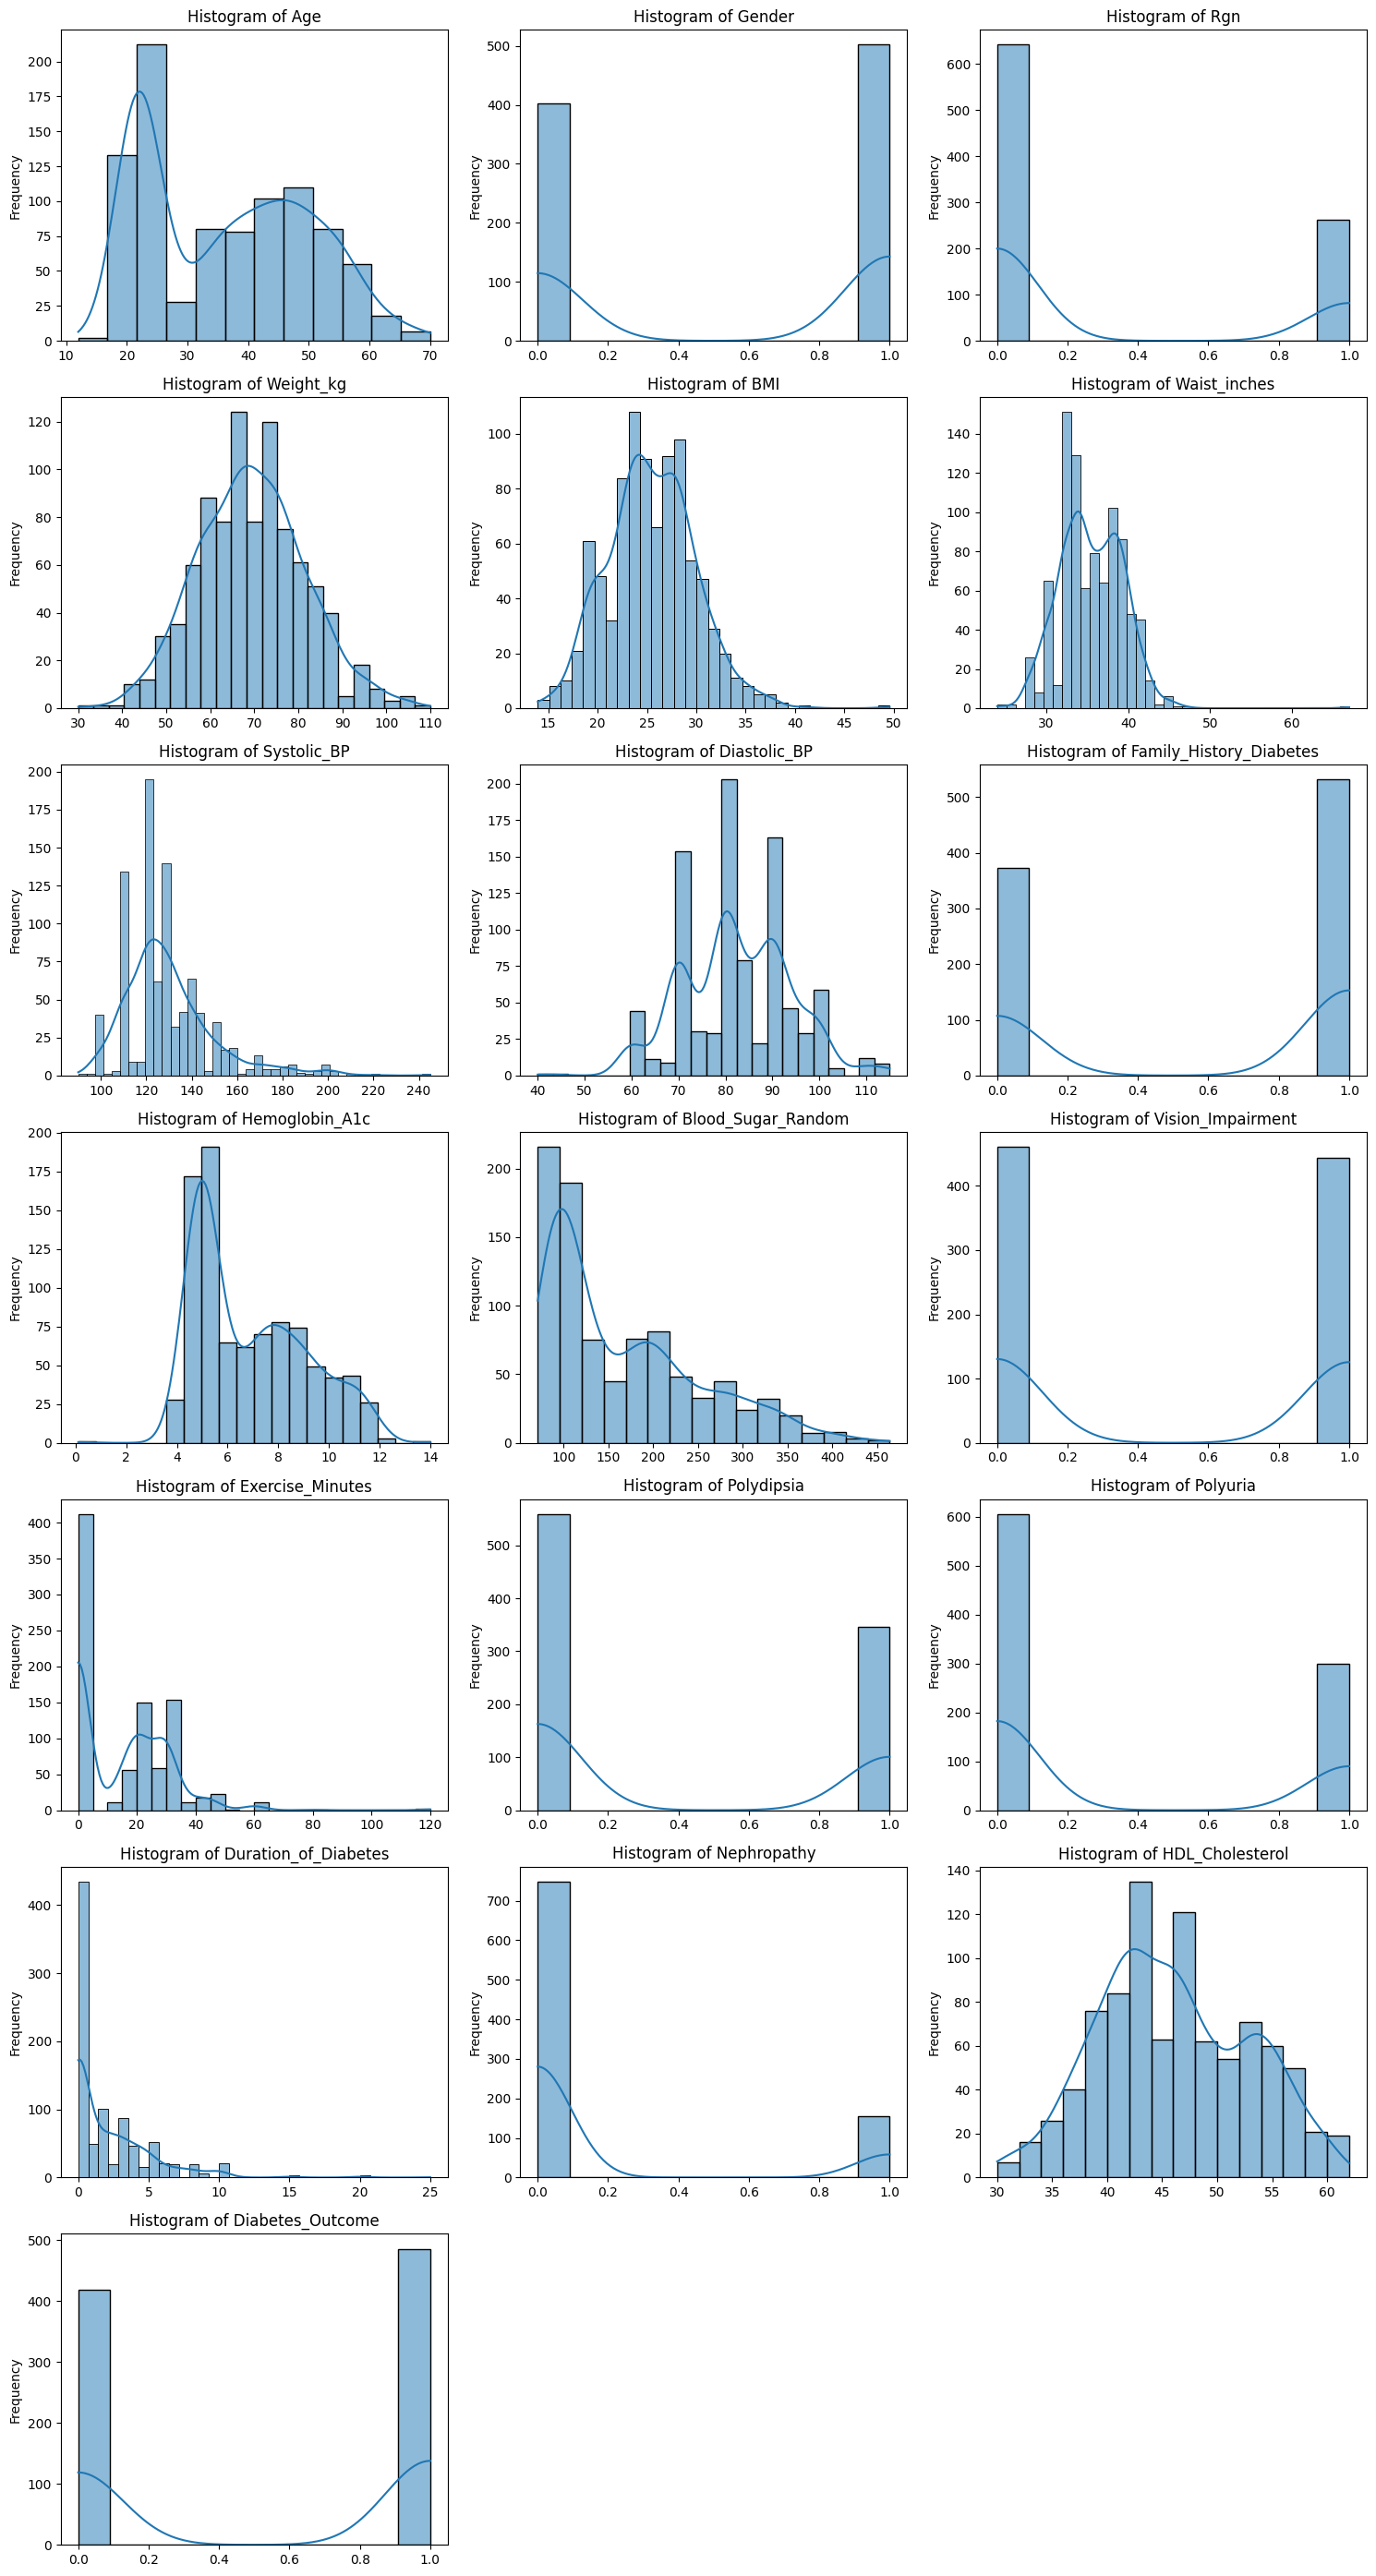

In [49]:
num_cols = len(df.columns)
ncols = 3
nrows = math.ceil(num_cols / ncols)

# Plot all histograms
plt.figure(figsize=(ncols * 5, nrows * 4))
for i, col in enumerate(df.columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

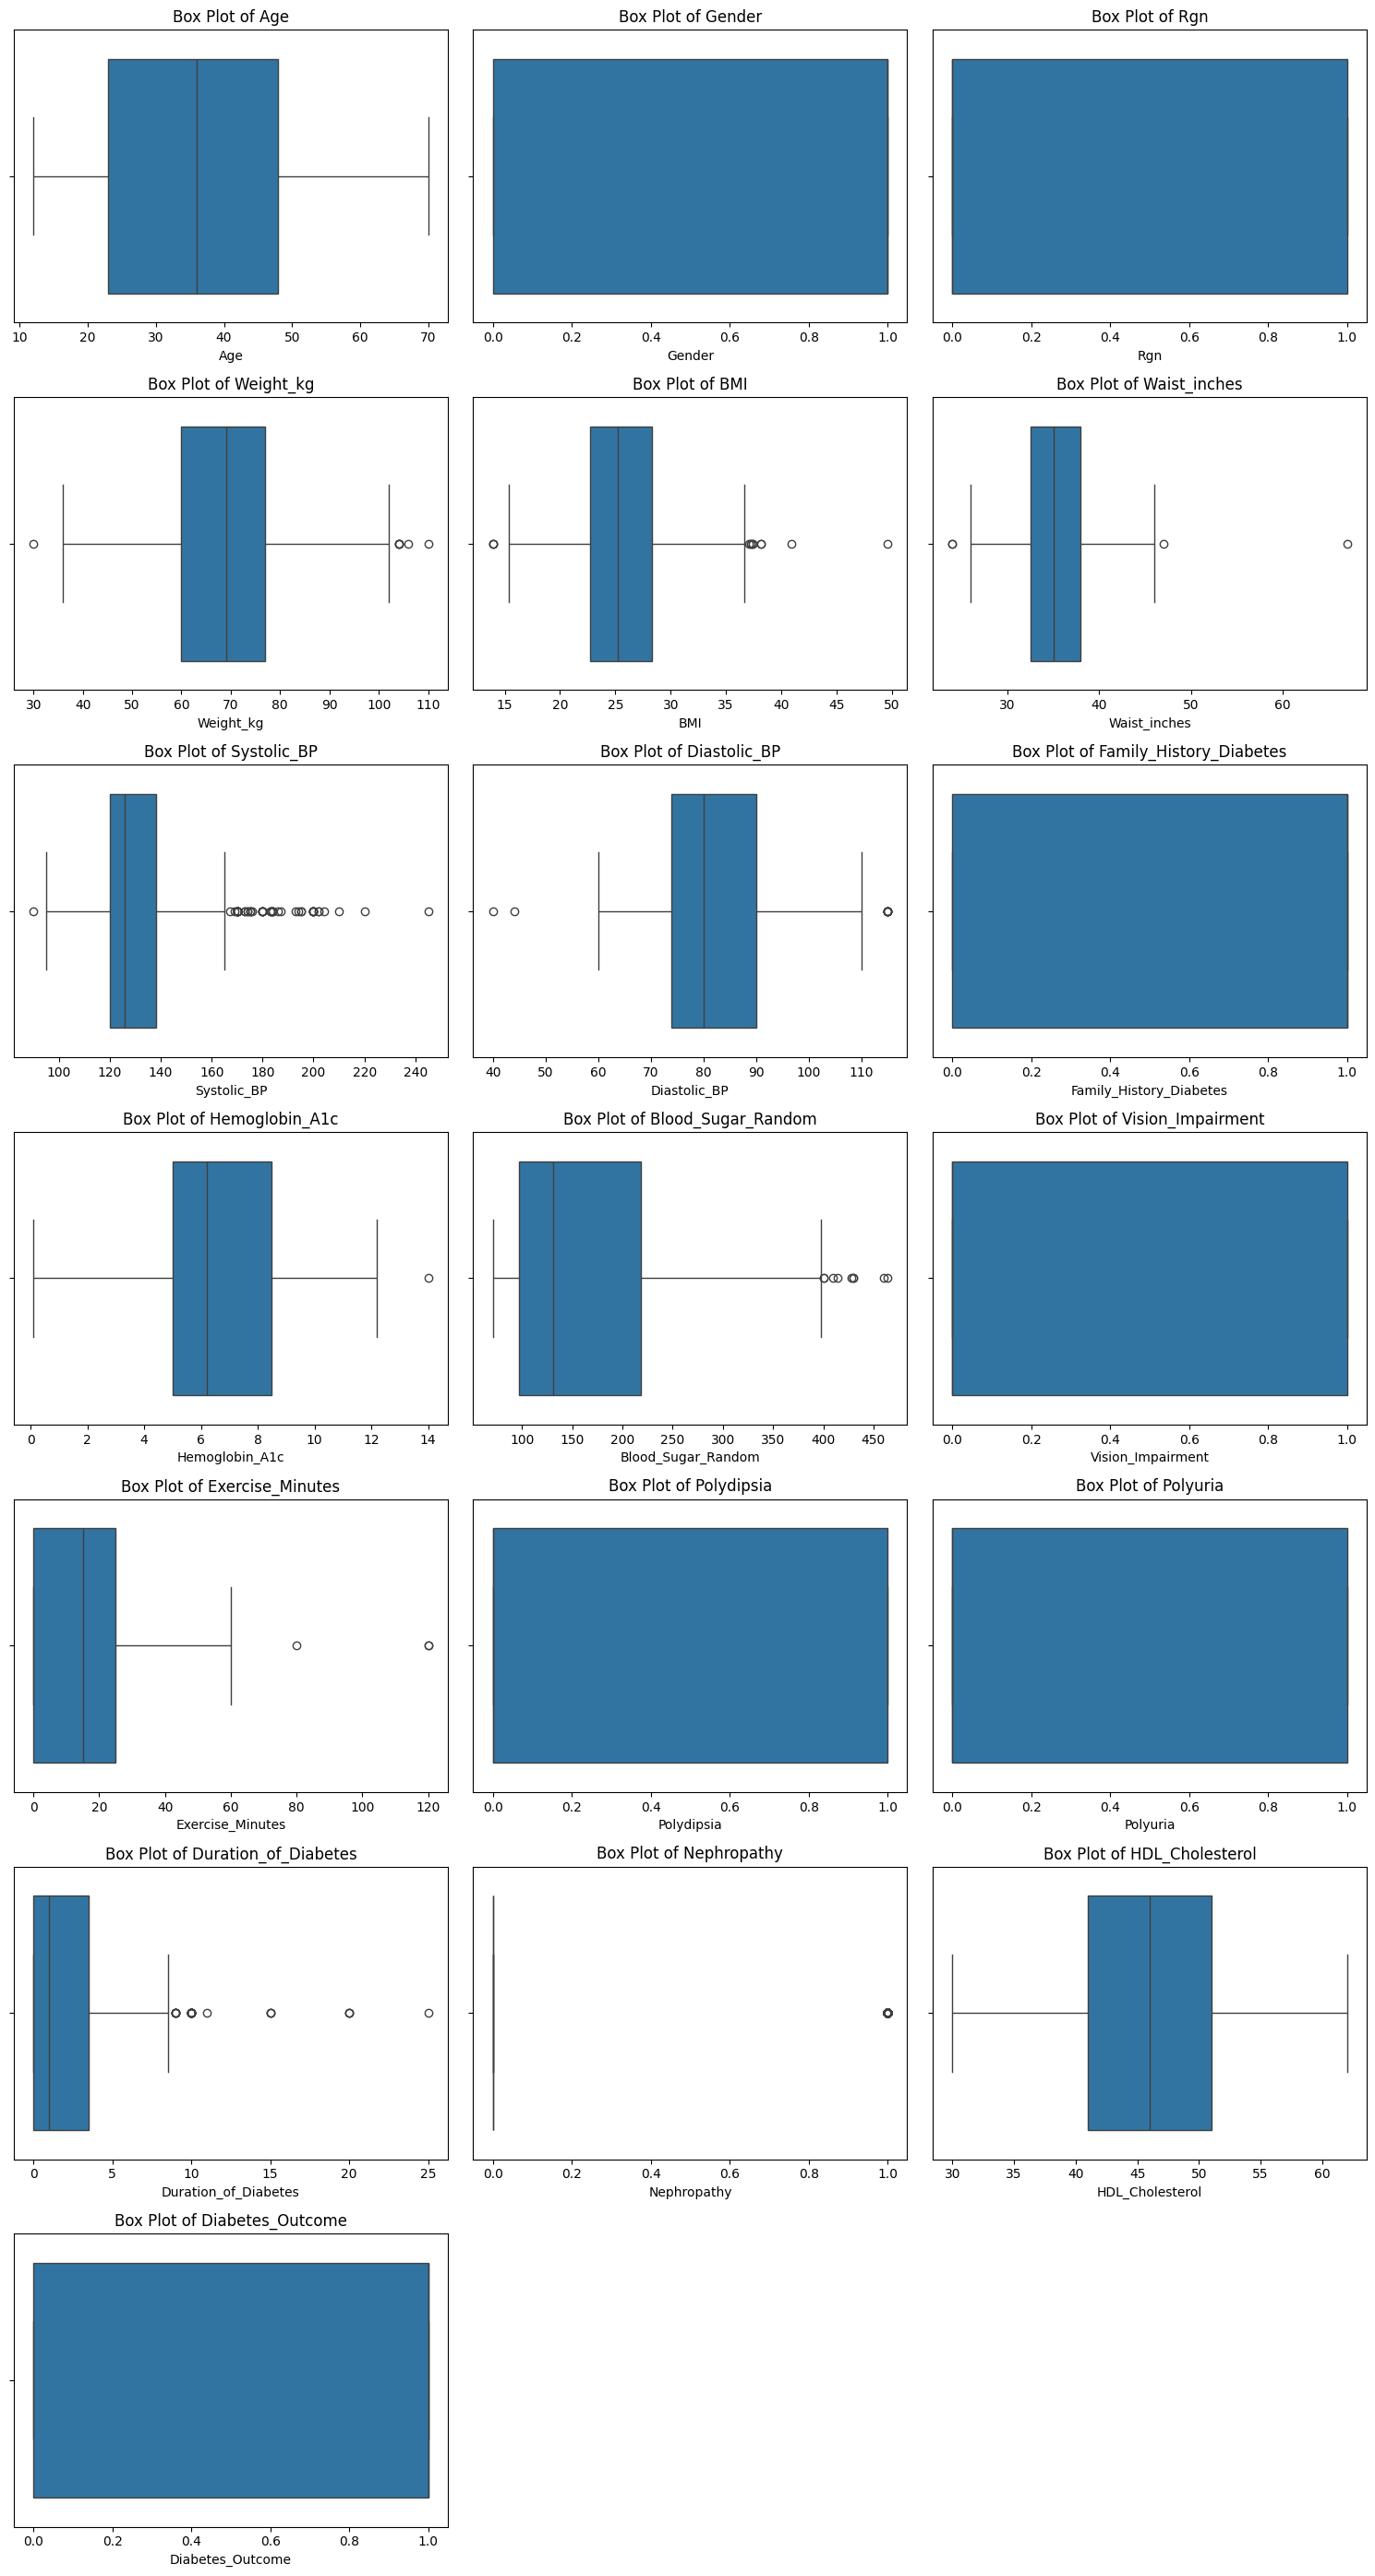

In [50]:
# Plot Box plot
plt.figure(figsize=(ncols * 5, nrows * 4))
for i, col in enumerate(df.columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Bivariate Analysis
1. correlations between continuous features and diabetes outcome
2. Box plot of categorical features and diabetes outcome

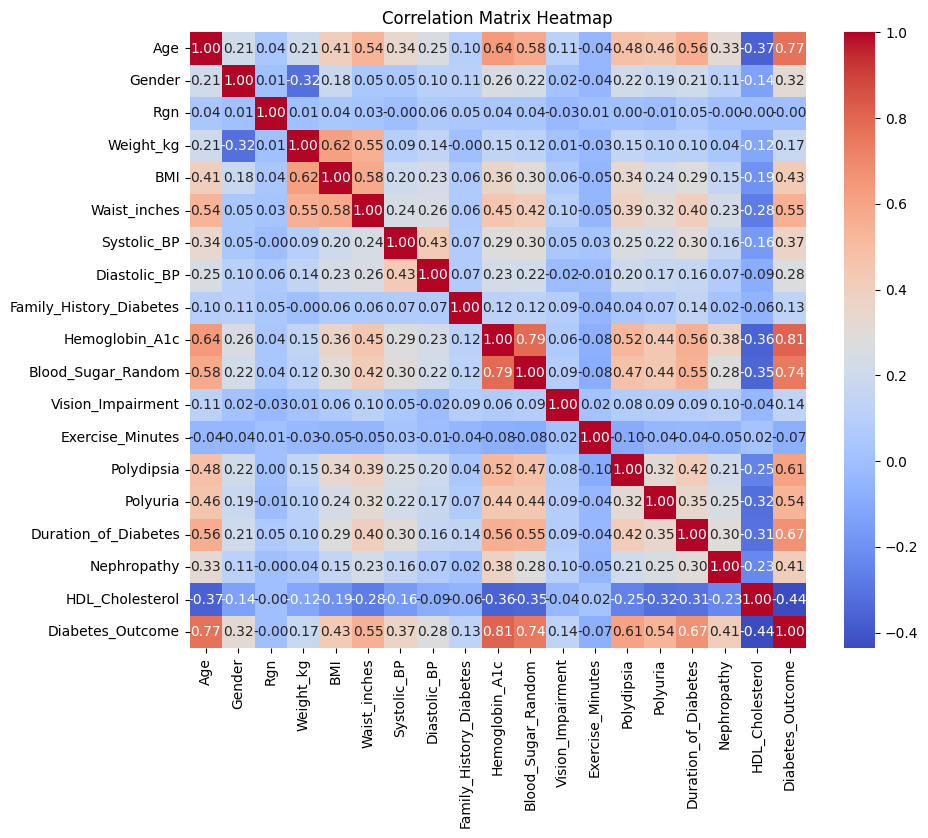

In [53]:
# Correlation Matrix:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


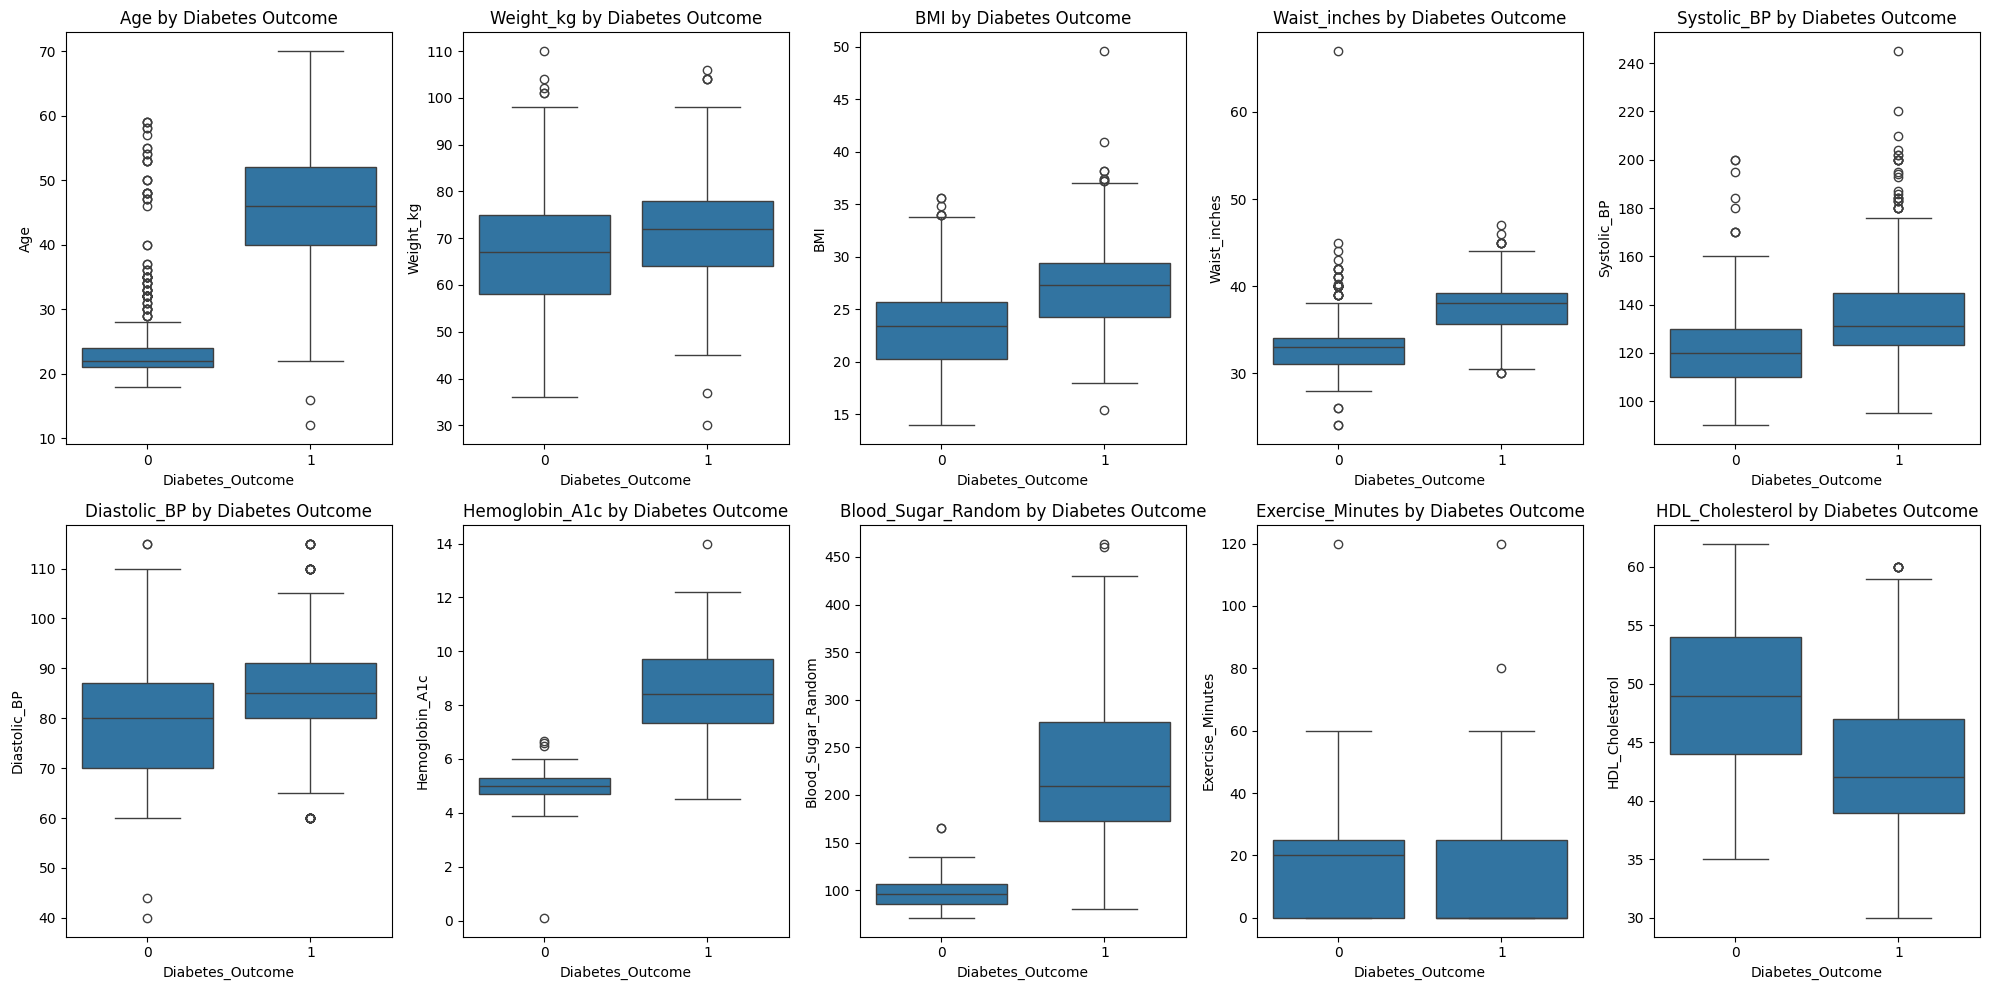

In [52]:
# Box plot of feature by outcome
cols = ['Age', 'Weight_kg', 'BMI', 'Waist_inches', 'Systolic_BP',
        'Diastolic_BP', 'Hemoglobin_A1c', 'Blood_Sugar_Random',
        'Exercise_Minutes', 'HDL_Cholesterol']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x='Diabetes_Outcome', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Diabetes Outcome')
    axes[i].set_xlabel("Diabetes_Outcome")
    axes[i].set_ylabel(f'{col}')

plt.tight_layout()
plt.show()

## Question 2: How does age impact diabetes prevalence, and is there a specific age group at higher risk?


### Distribution of Age with outcome

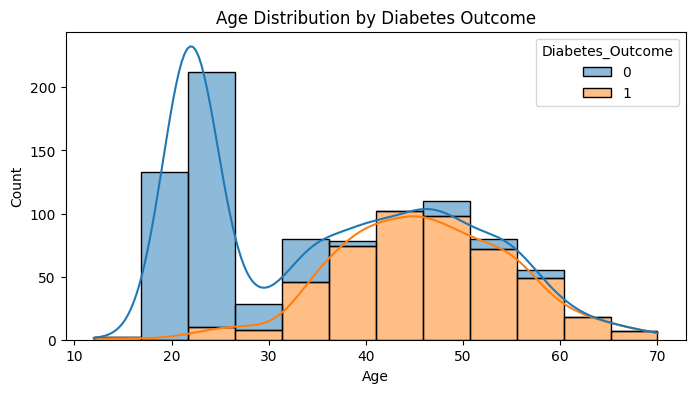

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', hue='Diabetes_Outcome', kde=True, multiple='stack')
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.show()

### Diabetes rate within different Age group

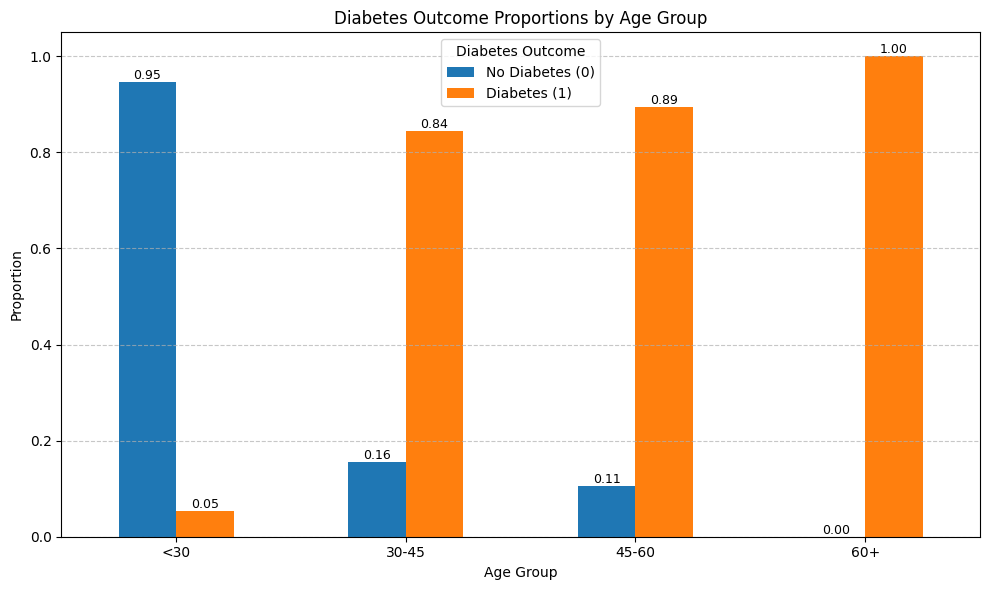

In [ ]:
df.loc[:, 'Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '60+'])
age_group_summary = df.groupby('Age_Group', observed=True)['Diabetes_Outcome'].value_counts(normalize=True).unstack()

ax = age_group_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Diabetes Outcome Proportions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for p in ax.patches:
  height = p.get_height()
  if not pd.isna(height):
    ax.annotate(f'{height:.2f}',
      (p.get_x() + p.get_width() / 2., height),
      ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## Question 3: What is the relationship between BMI and glucose levels, and how does obesity contribute to diabetes risk?



1. Scatter plot between BMI vs Blood sugar random
2. Blood Sugar and BMI category
3. BMI vs outcome

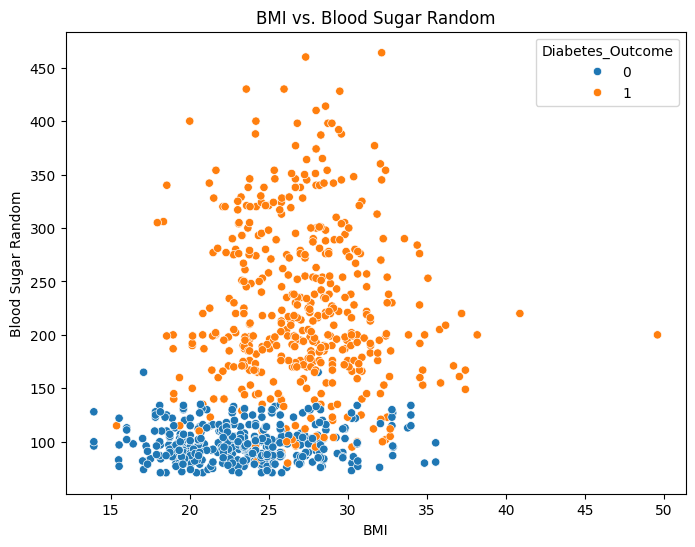

                         BMI  Blood_Sugar_Random
BMI                 1.000000            0.302698
Blood_Sugar_Random  0.302698            1.000000


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='Blood_Sugar_Random', hue='Diabetes_Outcome', data=df)
plt.title("BMI vs. Blood Sugar Random")
plt.xlabel("BMI")
plt.ylabel("Blood Sugar Random")
plt.show()

# Optionally, check the correlation
print(df[['BMI', 'Blood_Sugar_Random']].corr())

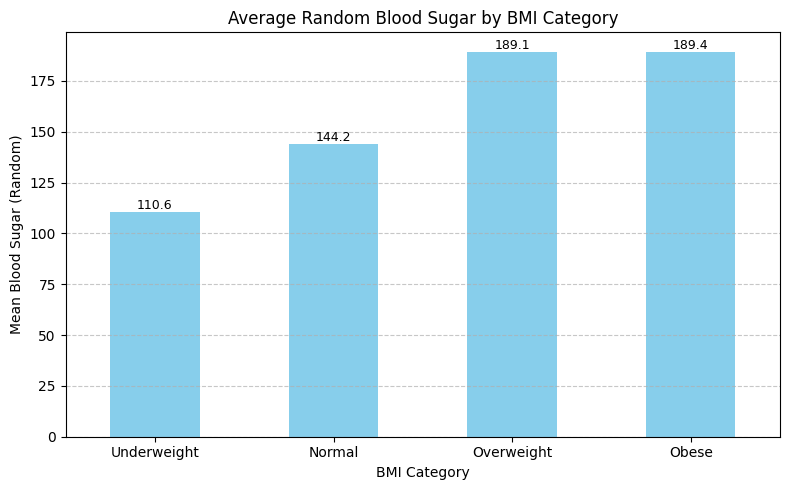

In [ ]:
df.loc[:, 'BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 60], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
bmi_summary = df.groupby('BMI_Category', observed=True)['Blood_Sugar_Random'].mean()


ax = bmi_summary.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Average Random Blood Sugar by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Mean Blood Sugar (Random)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{height:.1f}',(p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


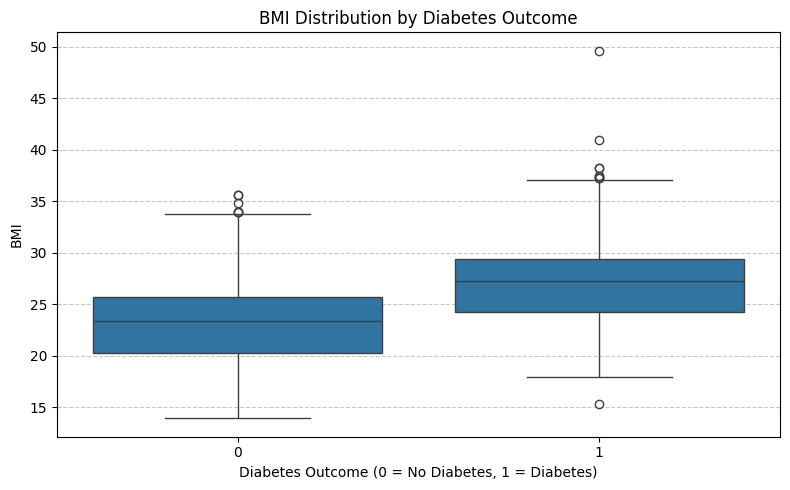

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diabetes_Outcome', y='BMI', data=df)

plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('BMI')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Question 4: Is there a gender-based disparity in diabetes prevalence, and what factors contribute to any observed differences?

### Propotion of diabetes outcome by gender

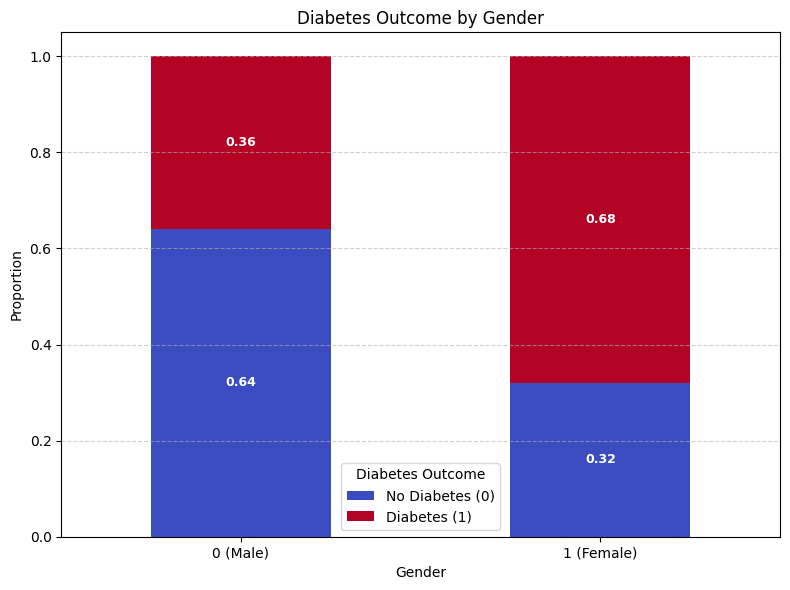

In [54]:
gender_table = pd.crosstab(df['Gender'], df['Diabetes_Outcome'])
gender_table_norm = pd.crosstab(df['Gender'], df['Diabetes_Outcome'], normalize='index')

ax = gender_table_norm.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')

plt.title("Diabetes Outcome by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title='Diabetes Outcome', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.xticks(rotation=0)
ax.set_xticklabels(['0 (Male)', '1 (Female)'])
plt.grid(axis='y', linestyle='--', alpha=0.6)


for container in ax.containers:
  for bar in container:
    height = bar.get_height()
    if height > 0:
      ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2), ha='center', va='center', color='white', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Lets look at possible confounding variables

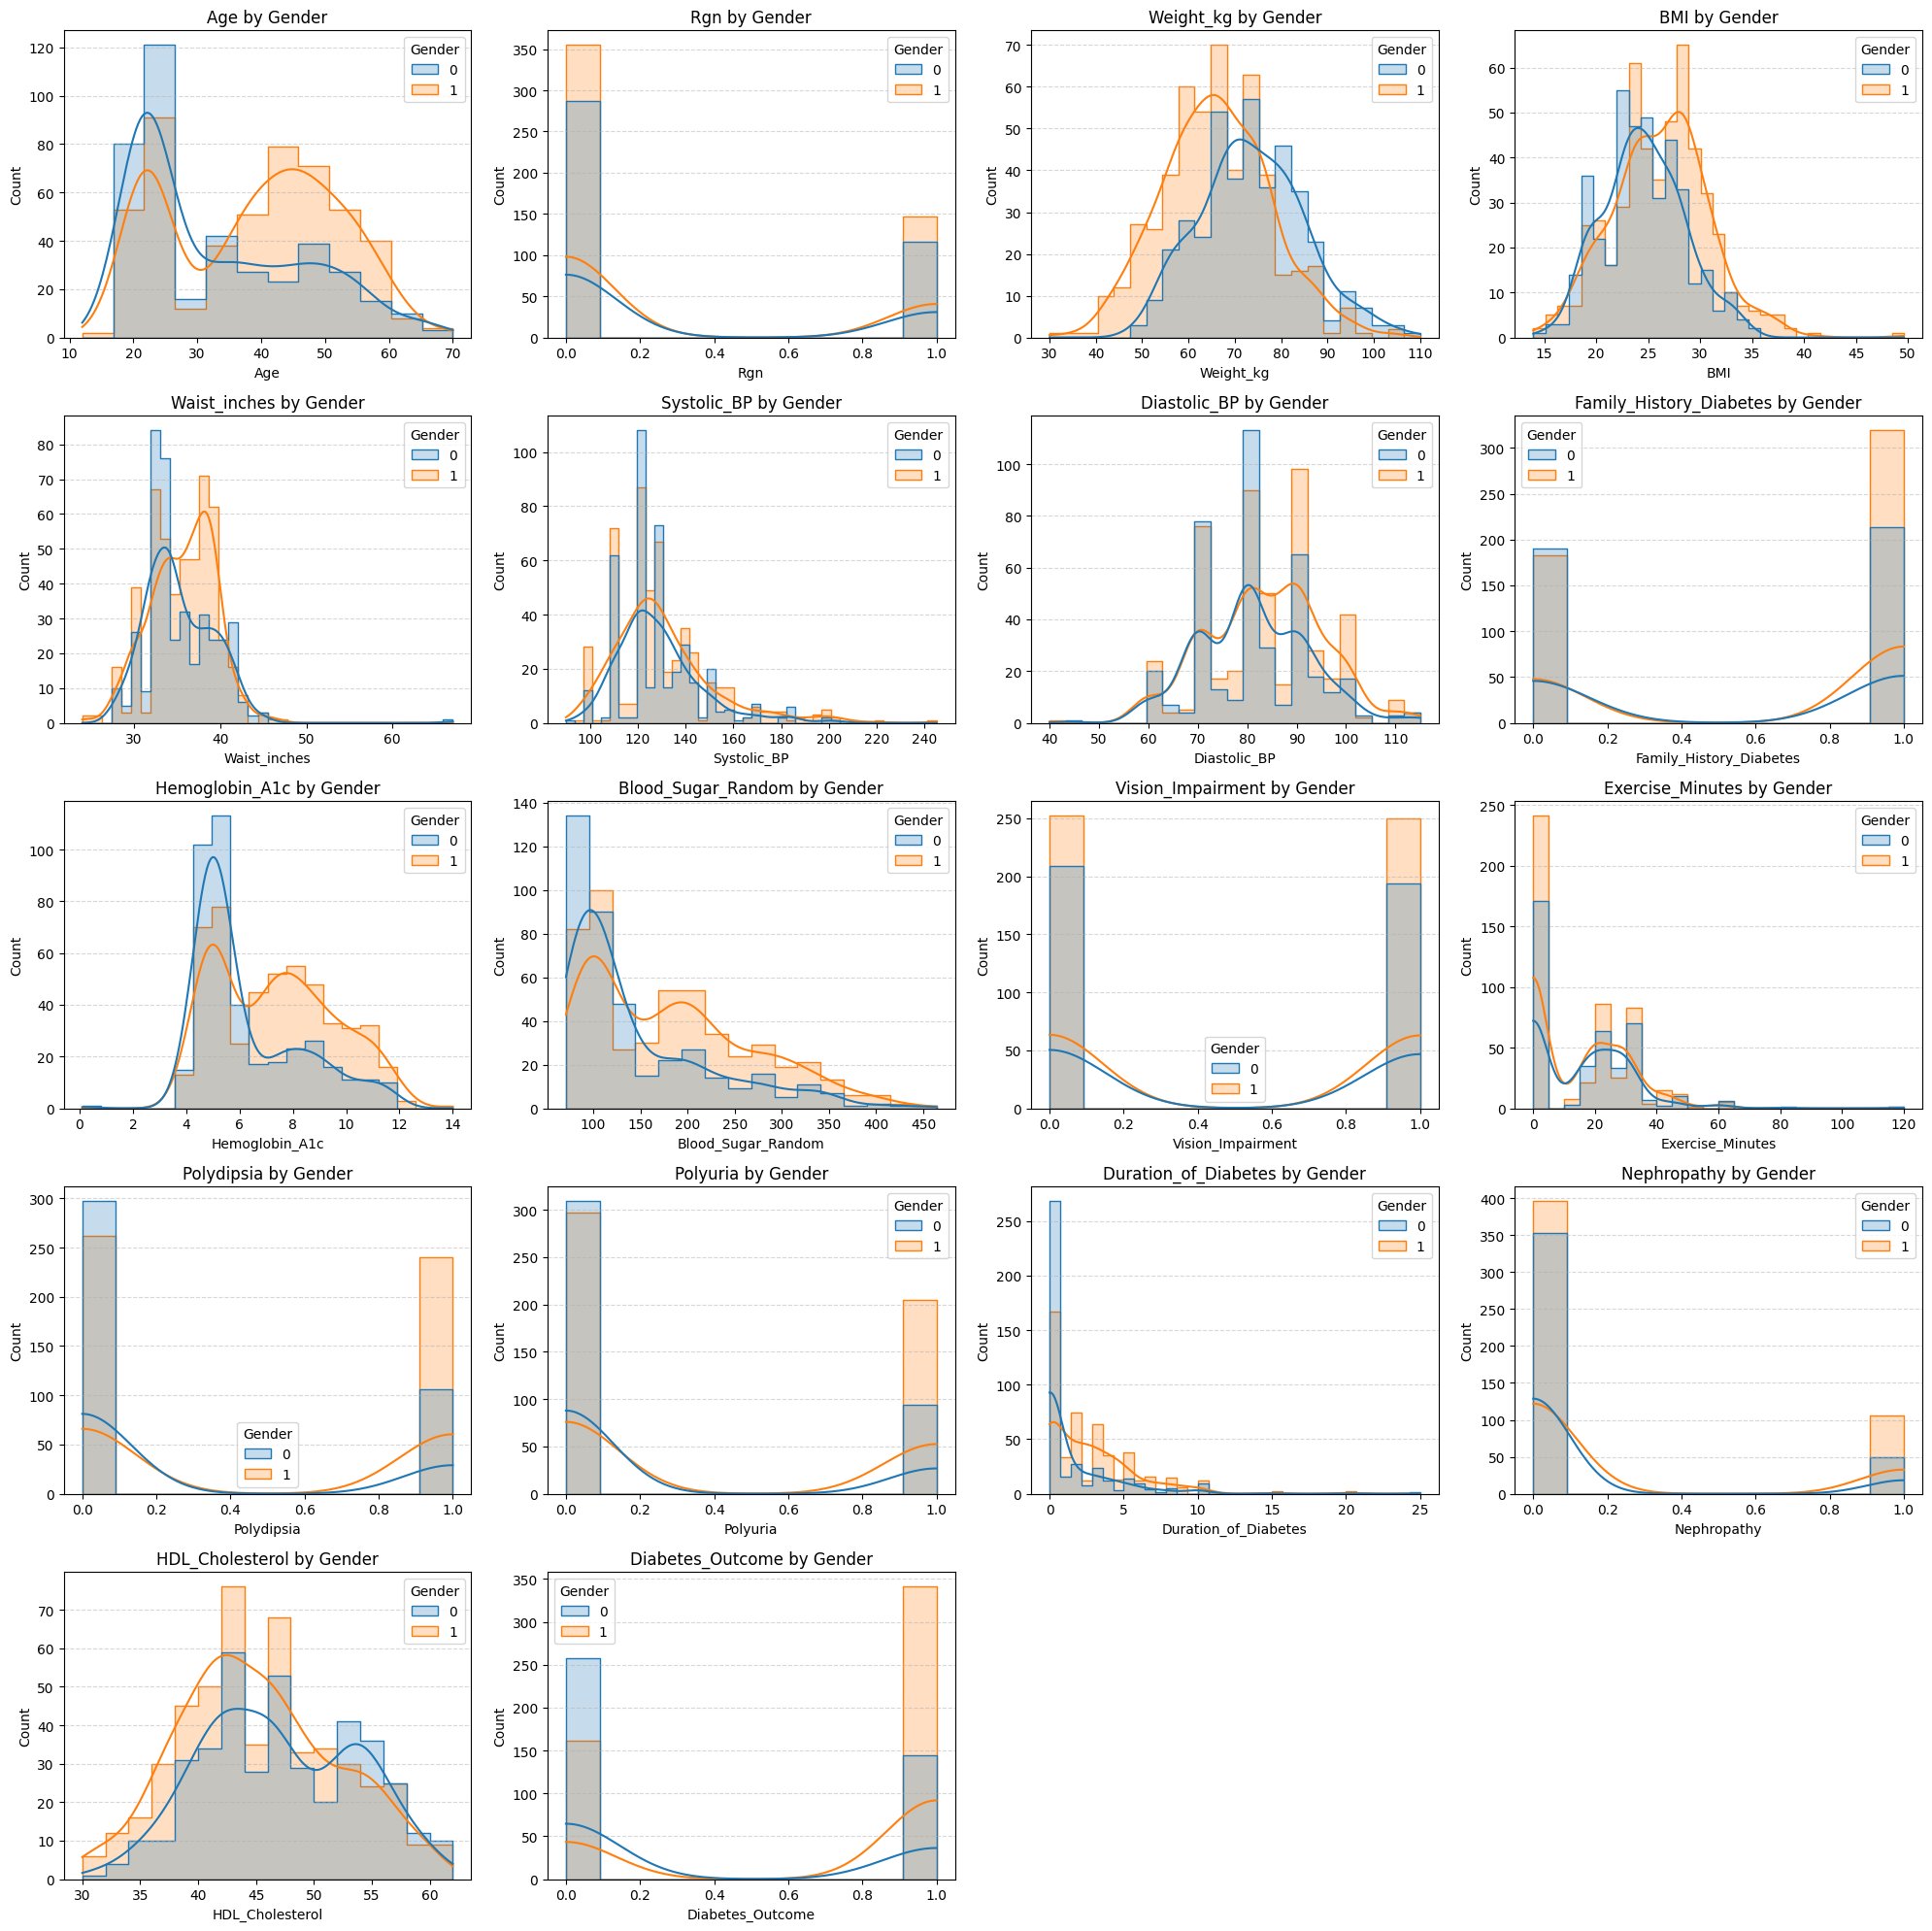

In [ ]:
columns = [col for col in list(df.columns) if col not in ['Gender', 'Age_Group', 'BMI_Category']]

n_cols = 4
n_rows = int(math.ceil(len(columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]

    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=col, hue='Gender', kde=True, element='step', ax=ax)
        ax.set_title(f'{col} by Gender')
        ax.set_ylabel('Count')
    else:
        sns.countplot(data=df, x=col, hue='Gender', ax=ax)
        ax.set_title(f'{col} by Gender')

    ax.set_xlabel(col)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


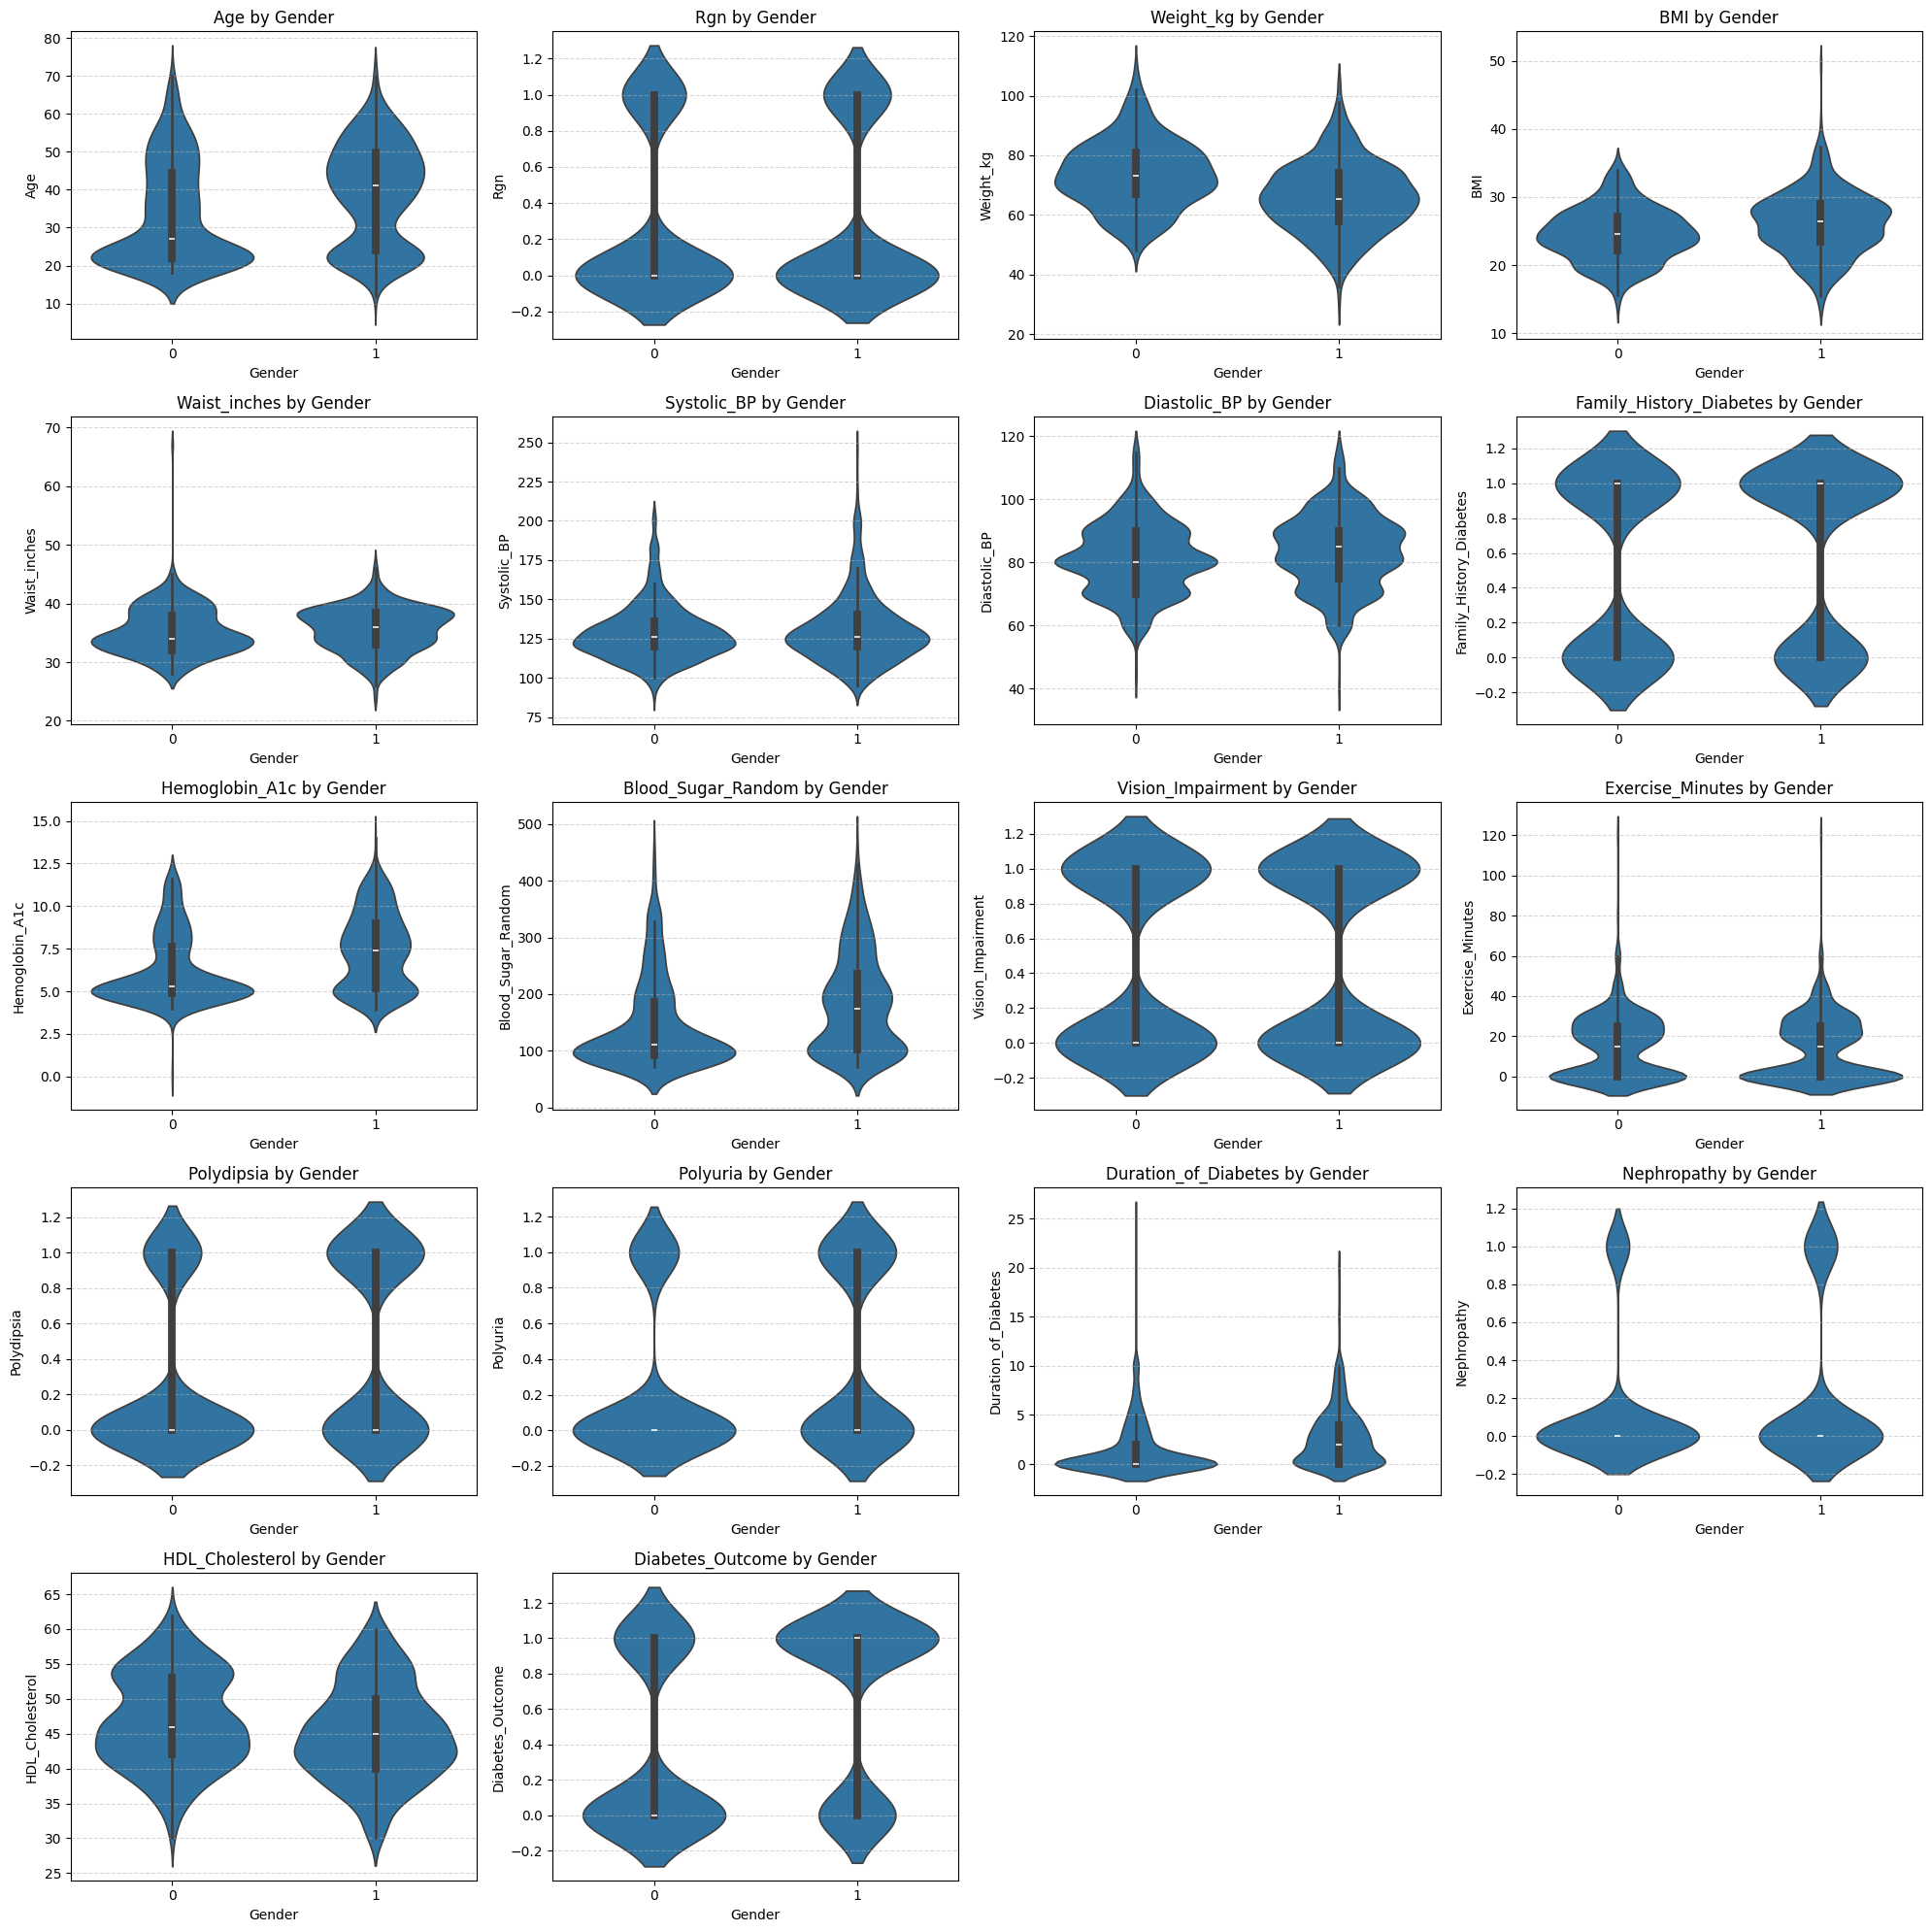

In [ ]:
numeric_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in ['Age_Group', 'BMI_Category', 'Gender']]

n_cols = 4
n_rows = int(math.ceil(len(numeric_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    sns.violinplot(data=df, x='Gender', y=col, ax=ax, inner='box')
    ax.set_title(f'{col} by Gender')
    ax.set_xlabel('Gender')
    ax.set_ylabel(col)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Question 5: To what extent does a family history of diabetes interact with lifestyle factors (exercise, diet inferred from weight/BMI) to influence the onset of diabetes?

In [ ]:
df_no_history = df[df['Family_History_Diabetes'] == 0]
df_history = df[df['Family_History_Diabetes'] == 1]

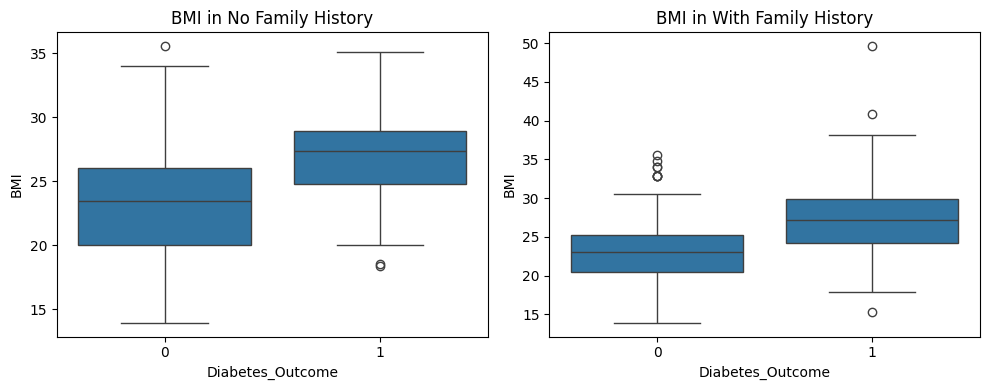

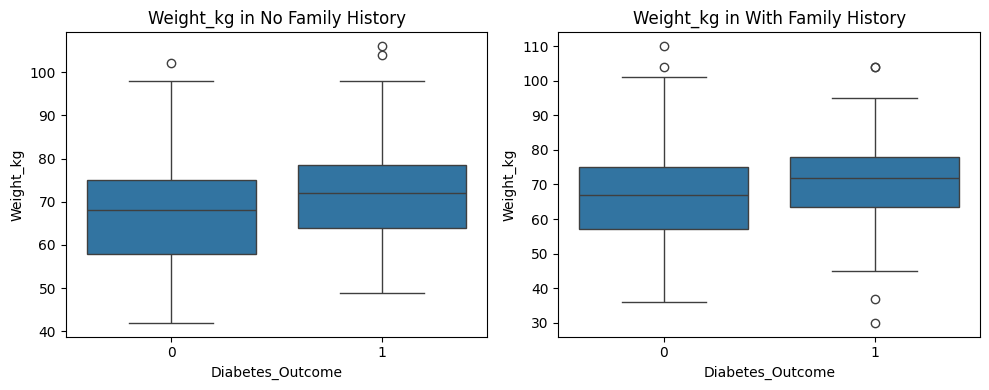

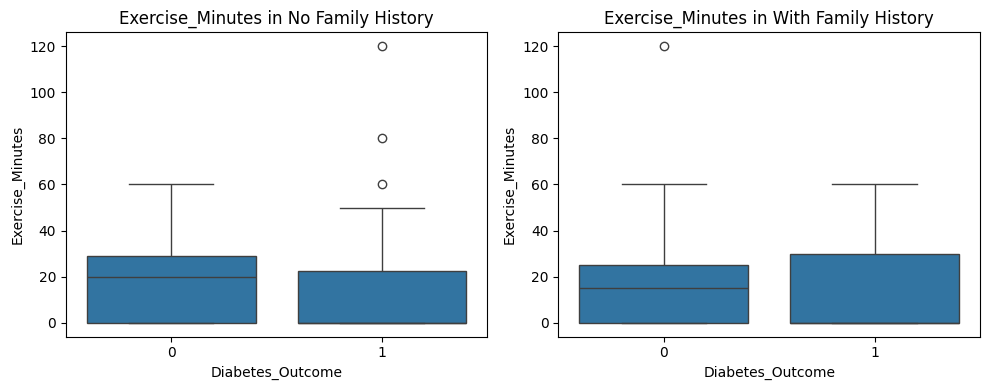

In [ ]:
lifestyle_vars = ['BMI', 'Weight_kg', 'Exercise_Minutes']
for var in lifestyle_vars:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.boxplot(x='Diabetes_Outcome', y=var, data=df_no_history)
    plt.title(f'{var} in No Family History')

    plt.subplot(1,2,2)
    sns.boxplot(x='Diabetes_Outcome', y=var, data=df_history)
    plt.title(f'{var} in With Family History')

    plt.tight_layout()
    plt.show()
